<a href="https://colab.research.google.com/github/Jorge-89/Data-Science-CoderHouse/blob/main/AED%20y%20Regresi%C3%B3n%20Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Exploratorio de Datos

Uno de los primeros pasos a la hora de realizar un proyecto que involucre el análisis de datos es explorar y visualizar los datos. El objetivo principal es obtener información sobre el contenido de los datos, ayudar a enmarcar las preguntas que haremos y detectar posibles vías para avanzar en las respuestas a estas preguntas.

In [1]:
#se importan las librerias necesarias
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#se importa el set de datos
url = 'https://raw.githubusercontent.com/Jorge-89/Data-Science-CoderHouse/main/base_datos_estaciones_met_V3.csv'
df = pd.read_csv(url, sep=";")

In [3]:
#se visualiza las primeras 5 filas
df.head()

,fecha_completa,Fecha,Hora,Temp_Alicia AgriculturaCba,Humedad_Alicia AgriculturaCba,PP_Alicia AgriculturaCba,Temp_Las Varas AgriculturaCba,Humedad_Las Varas AgriculturaCba,PP_Las Varas AgriculturaCba,Temp_San Miguel - Establecimiento Don Luis,Humedad_San Miguel - Establecimiento Don Luis,PP_San Miguel - Establecimiento Don Luis,Temp_San Miguel - Listello,Humedad_San Miguel - Listello,PP_San Miguel - Listello,Temp_ San Miguel - Las Varillas,Humedad_ San Miguel - Las Varillas,PP_ San Miguel - Las Varillas
0,1/1/2021 0:00,1/1/2021,0:00,16.8,77.8,0.0,17.0,77.8,0.0,15.6,83.3,0.0,15.6,85.4,0.0,15.3,87.2,0.0
1,1/1/2021 0:10,1/1/2021,0:10,16.7,80.0,0.0,16.8,80.4,0.0,15.7,84.6,0.0,15.5,86.6,0.0,15.2,86.7,0.0
2,1/1/2021 0:20,1/1/2021,0:20,16.5,81.7,0.0,16.5,81.8,0.0,15.7,84.4,0.0,15.2,87.4,0.0,15.1,86.9,0.0
3,1/1/2021 0:30,1/1/2021,0:30,16.2,83.0,0.0,16.4,80.7,0.0,15.5,84.4,0.0,15.0,88.5,0.0,15.0,87.5,0.0
4,1/1/2021 0:40,1/1/2021,0:40,16.1,82.9,0.0,16.3,81.3,0.0,15.2,85.3,0.0,14.9,87.9,0.0,14.8,87.9,0.0


In [40]:
df.tail()

,fecha_completa,Fecha,Hora,Temp_Alicia AgriculturaCba,Humedad_Alicia AgriculturaCba,PP_Alicia AgriculturaCba,Temp_Las Varas AgriculturaCba,Humedad_Las Varas AgriculturaCba,PP_Las Varas AgriculturaCba,Temp_San Miguel - Establecimiento Don Luis,Humedad_San Miguel - Establecimiento Don Luis,PP_San Miguel - Establecimiento Don Luis,Temp_San Miguel - Listello,Humedad_San Miguel - Listello,PP_San Miguel - Listello,Temp_ San Miguel - Las Varillas,Humedad_ San Miguel - Las Varillas,PP_ San Miguel - Las Varillas
12955,31/3/2021 23:10,31/3/2021,23:10,14.4,84.7,0.0,14.8,83.4,0.0,12.9,88.3,0.0,12.3,92.2,0.0,13.4,88.5,0.0
12956,31/3/2021 23:20,31/3/2021,23:20,14.2,85.2,0.0,14.7,83.6,0.0,12.8,89.1,0.0,12.2,91.9,0.0,13.2,89.2,0.0
12957,31/3/2021 23:30,31/3/2021,23:30,14.1,85.4,0.0,14.6,83.8,0.0,12.7,89.5,0.0,12.1,92.0,0.0,13.1,89.6,0.0
12958,31/3/2021 23:40,31/3/2021,23:40,14.0,86.1,0.0,14.6,83.9,0.0,12.7,89.6,0.0,12.1,92.3,0.0,13.0,89.7,0.0
12959,31/3/2021 23:50,31/3/2021,23:50,13.9,86.3,0.0,14.7,83.7,0.0,12.7,89.4,0.0,12.0,93.1,0.0,12.9,89.7,0.0


In [4]:
#observamos como cada columna tiene 12960 datos sin  faltantes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   fecha_completa                                 12960 non-null  object 
 1   Fecha                                          12960 non-null  object 
 2   Hora                                           12960 non-null  object 
 3   Temp_Alicia AgriculturaCba                     12960 non-null  float64
 4   Humedad_Alicia AgriculturaCba                  12960 non-null  float64
 5   PP_Alicia AgriculturaCba                       12960 non-null  float64
 6   Temp_Las Varas AgriculturaCba                  12960 non-null  float64
 7   Humedad_Las Varas AgriculturaCba               12960 non-null  float64
 8   PP_Las Varas AgriculturaCba                    12960 non-null  float64
 9   Temp_San Miguel - Establecimiento Don Luis     129

In [38]:
 df.isnull().values.any()
 #Revisa si hay faltantes en el df

False

In [39]:
df.isnull().sum()
#Muestra realmente el número de faltantes en las columnas

fecha_completa                                   0
Fecha                                            0
Hora                                             0
Temp_Alicia AgriculturaCba                       0
Humedad_Alicia AgriculturaCba                    0
PP_Alicia AgriculturaCba                         0
Temp_Las Varas AgriculturaCba                    0
Humedad_Las Varas AgriculturaCba                 0
PP_Las Varas AgriculturaCba                      0
Temp_San Miguel - Establecimiento Don Luis       0
Humedad_San Miguel - Establecimiento Don Luis    0
PP_San Miguel - Establecimiento Don Luis         0
Temp_San Miguel - Listello                       0
Humedad_San Miguel - Listello                    0
PP_San Miguel - Listello                         0
Temp_ San Miguel - Las Varillas                  0
Humedad_ San Miguel - Las Varillas               0
PP_ San Miguel - Las Varillas                    0
dtype: int64

In [5]:
df.columns

#se muestra una lista con todos los nombres de las columnas

Index(['fecha_completa', 'Fecha', 'Hora', 'Temp_Alicia AgriculturaCba',
       'Humedad_Alicia AgriculturaCba', 'PP_Alicia AgriculturaCba',
       'Temp_Las Varas AgriculturaCba', 'Humedad_Las Varas AgriculturaCba',
       'PP_Las Varas AgriculturaCba',
       'Temp_San Miguel - Establecimiento Don Luis',
       'Humedad_San Miguel - Establecimiento Don Luis',
       'PP_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'PP_San Miguel - Listello', 'Temp_ San Miguel - Las Varillas',
       'Humedad_ San Miguel - Las Varillas', 'PP_ San Miguel - Las Varillas'],
      dtype='object')

In [6]:
df.describe()
#muestra los estadísticos básicos 

# Se comprueba que no hay en la base de datos, valores fisicamente imposibles:
# Humedad relativa mayor al 100% o menor al 0%
# Precipitación negativa
# Valores de temperaturas menores a 0° que seria imposible para la epoca analizada o valores máximos que superen los 45°C 

,Temp_Alicia AgriculturaCba,Humedad_Alicia AgriculturaCba,PP_Alicia AgriculturaCba,Temp_Las Varas AgriculturaCba,Humedad_Las Varas AgriculturaCba,PP_Las Varas AgriculturaCba,Temp_San Miguel - Establecimiento Don Luis,Humedad_San Miguel - Establecimiento Don Luis,PP_San Miguel - Establecimiento Don Luis,Temp_San Miguel - Listello,Humedad_San Miguel - Listello,PP_San Miguel - Listello,Temp_ San Miguel - Las Varillas,Humedad_ San Miguel - Las Varillas,PP_ San Miguel - Las Varillas
count,12960.000000,12960.000000,12960.00000,12960.000000,12960.000000,12960.000000,12960.000000,12960.000000,12960.000000,12960.000000,12960.000000,12960.000000,12960.000000,12960.000000,12960.000000
mean,22.227585,72.410764,0.01929,22.179522,72.188804,0.018812,21.288519,74.960463,0.028164,21.464213,74.708287,0.006512,21.711065,73.923634,0.015386
std,5.827893,21.586566,0.21620,5.814185,20.072673,0.193260,5.932179,20.639414,0.330379,6.130940,21.712248,0.053873,6.148653,21.907371,0.160468
min,9.300000,13.500000,0.00000,9.600000,14.600000,0.000000,8.700000,12.400000,0.000000,8.600000,12.700000,0.000000,7.900000,13.100000,0.000000
25%,17.900000,54.300000,0.00000,17.800000,55.800000,0.000000,16.800000,58.800000,0.000000,16.900000,56.375000,0.000000,17.200000,54.600000,0.000000
50%,21.300000,77.000000,0.00000,21.100000,77.500000,0.000000,20.300000,81.500000,0.000000,20.400000,81.800000,0.000000,20.700000,80.500000,0.000000
75%,26.600000,91.800000,0.00000,26.700000,89.800000,0.000000,26.000000,92.725000,0.000000,26.000000,94.100000,0.000000,26.500000,93.700000,0.000000
max,36.800000,100.000000,8.80000,36.500000,100.000000,7.200000,36.200000,100.000000,12.600000,37.300000,100.000000,1.600000,36.900000,100.000000,5.600000


In [28]:
matriz=df.corr()
matriz

,Temp_Alicia AgriculturaCba,Humedad_Alicia AgriculturaCba,PP_Alicia AgriculturaCba,Temp_Las Varas AgriculturaCba,Humedad_Las Varas AgriculturaCba,PP_Las Varas AgriculturaCba,Temp_San Miguel - Establecimiento Don Luis,Humedad_San Miguel - Establecimiento Don Luis,PP_San Miguel - Establecimiento Don Luis,Temp_San Miguel - Listello,Humedad_San Miguel - Listello,PP_San Miguel - Listello,Temp_ San Miguel - Las Varillas,Humedad_ San Miguel - Las Varillas,PP_ San Miguel - Las Varillas
Temp_Alicia AgriculturaCba,1.000000,-0.855478,-0.046852,0.986934,-0.849260,-0.054520,0.981354,-0.852691,-0.038764,0.984871,-0.867068,-0.012581,0.986801,-0.869937,-0.052938
Humedad_Alicia AgriculturaCba,-0.855478,1.000000,0.092315,-0.847509,0.976913,0.104700,-0.843577,0.970052,0.085725,-0.849606,0.973638,0.025532,-0.837187,0.982313,0.096491
PP_Alicia AgriculturaCba,-0.046852,0.092315,1.000000,-0.041179,0.087344,0.435590,-0.037308,0.080291,0.299814,-0.042569,0.080602,0.196187,-0.041419,0.086333,0.621443
Temp_Las Varas AgriculturaCba,0.986934,-0.847509,-0.041179,1.000000,-0.860043,-0.054480,0.983767,-0.850658,-0.034398,0.991461,-0.870375,-0.010651,0.988431,-0.870158,-0.050098
Humedad_Las Varas AgriculturaCba,-0.849260,0.976913,0.087344,-0.860043,1.000000,0.100670,-0.844531,0.970140,0.077085,-0.854681,0.983466,0.026863,-0.839664,0.980746,0.095457
PP_Las Varas AgriculturaCba,-0.054520,0.104700,0.435590,-0.054480,0.100670,1.000000,-0.045221,0.090830,0.328748,-0.051575,0.093559,0.253571,-0.050341,0.099080,0.449902
Temp_San Miguel - Establecimiento Don Luis,0.981354,-0.843577,-0.037308,0.983767,-0.844531,-0.045221,1.000000,-0.865415,-0.036565,0.982220,-0.866812,-0.000766,0.982729,-0.867195,-0.045403
Humedad_San Miguel - Establecimiento Don Luis,-0.852691,0.970052,0.080291,-0.850658,0.970140,0.090830,-0.865415,1.000000,0.073960,-0.855091,0.972979,0.015508,-0.841654,0.974240,0.085600
PP_San Miguel - Establecimiento Don Luis,-0.038764,0.085725,0.299814,-0.034398,0.077085,0.328748,-0.036565,0.073960,1.000000,-0.032762,0.067897,0.168494,-0.030841,0.072385,0.254292
Temp_San Miguel - Listello,0.984871,-0.849606,-0.042569,0.991461,-0.854681,-0.051575,0.982220,-0.855091,-0.032762,1.000000,-0.875068,-0.010471,0.986959,-0.874899,-0.051024


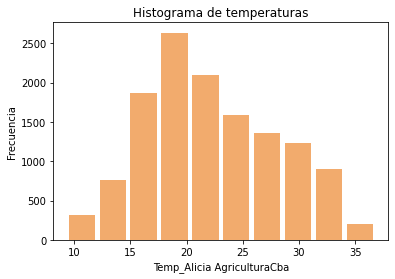

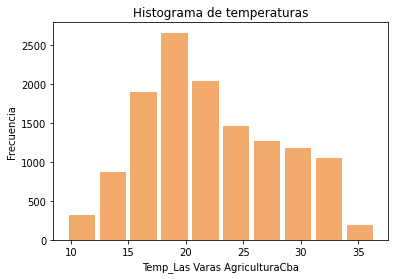

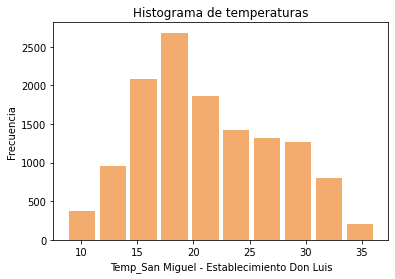

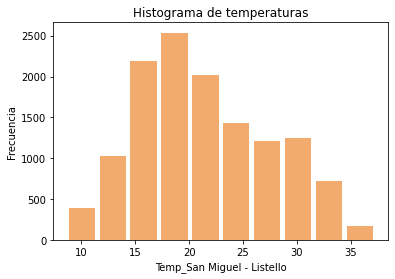

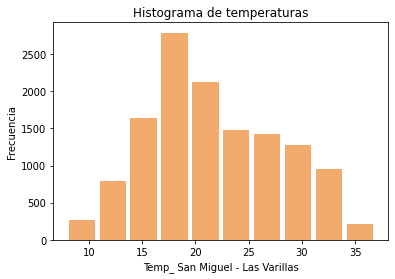

In [48]:
variables= df.columns

#histograma de las temperaturas en las distintas estaciones
for i in range(3,18,3):
  
    
    plt.hist(df[variables[i]],color='#F2AB6D', rwidth=0.85,)
    plt.title('Histograma de temperaturas')
    plt.xlabel(variables[i])
    plt.ylabel('Frecuencia')
    plt.show() #dibujamos el histograma

# A simple vista se observa que la temperatura tiene una distribución muy similar a la normal.

In [10]:
variables

Index(['fecha_completa', 'Fecha', 'Hora', 'Temp_Alicia AgriculturaCba',
       'Humedad_Alicia AgriculturaCba', 'PP_Alicia AgriculturaCba',
       'Temp_Las Varas AgriculturaCba', 'Humedad_Las Varas AgriculturaCba',
       'PP_Las Varas AgriculturaCba',
       'Temp_San Miguel - Establecimiento Don Luis',
       'Humedad_San Miguel - Establecimiento Don Luis',
       'PP_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'PP_San Miguel - Listello', 'Temp_ San Miguel - Las Varillas',
       'Humedad_ San Miguel - Las Varillas', 'PP_ San Miguel - Las Varillas'],
      dtype='object')

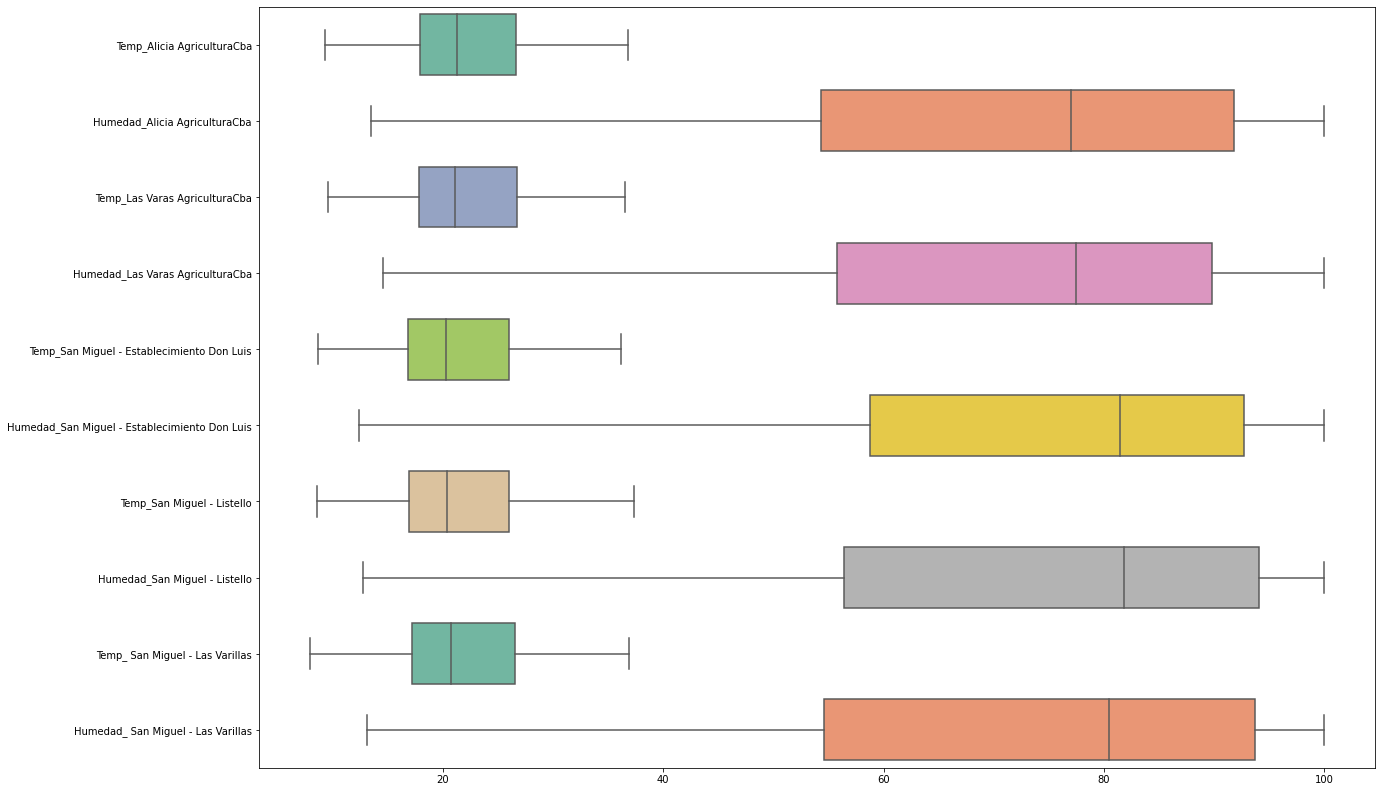

In [24]:
# Box-Plots, no se aprecia en los datos ningun valor extremo, al menos con este procedimiento en la variable temperatura para las distintas estaciones.
plt.figure(figsize=(20,14))
ax = sns.boxplot(data=df[[variables[3],variables[4], variables[6],variables[7], variables[9],variables[10],variables[12],variables[13], variables[15], variables[16]]], orient="h", palette="Set2",fliersize=15)

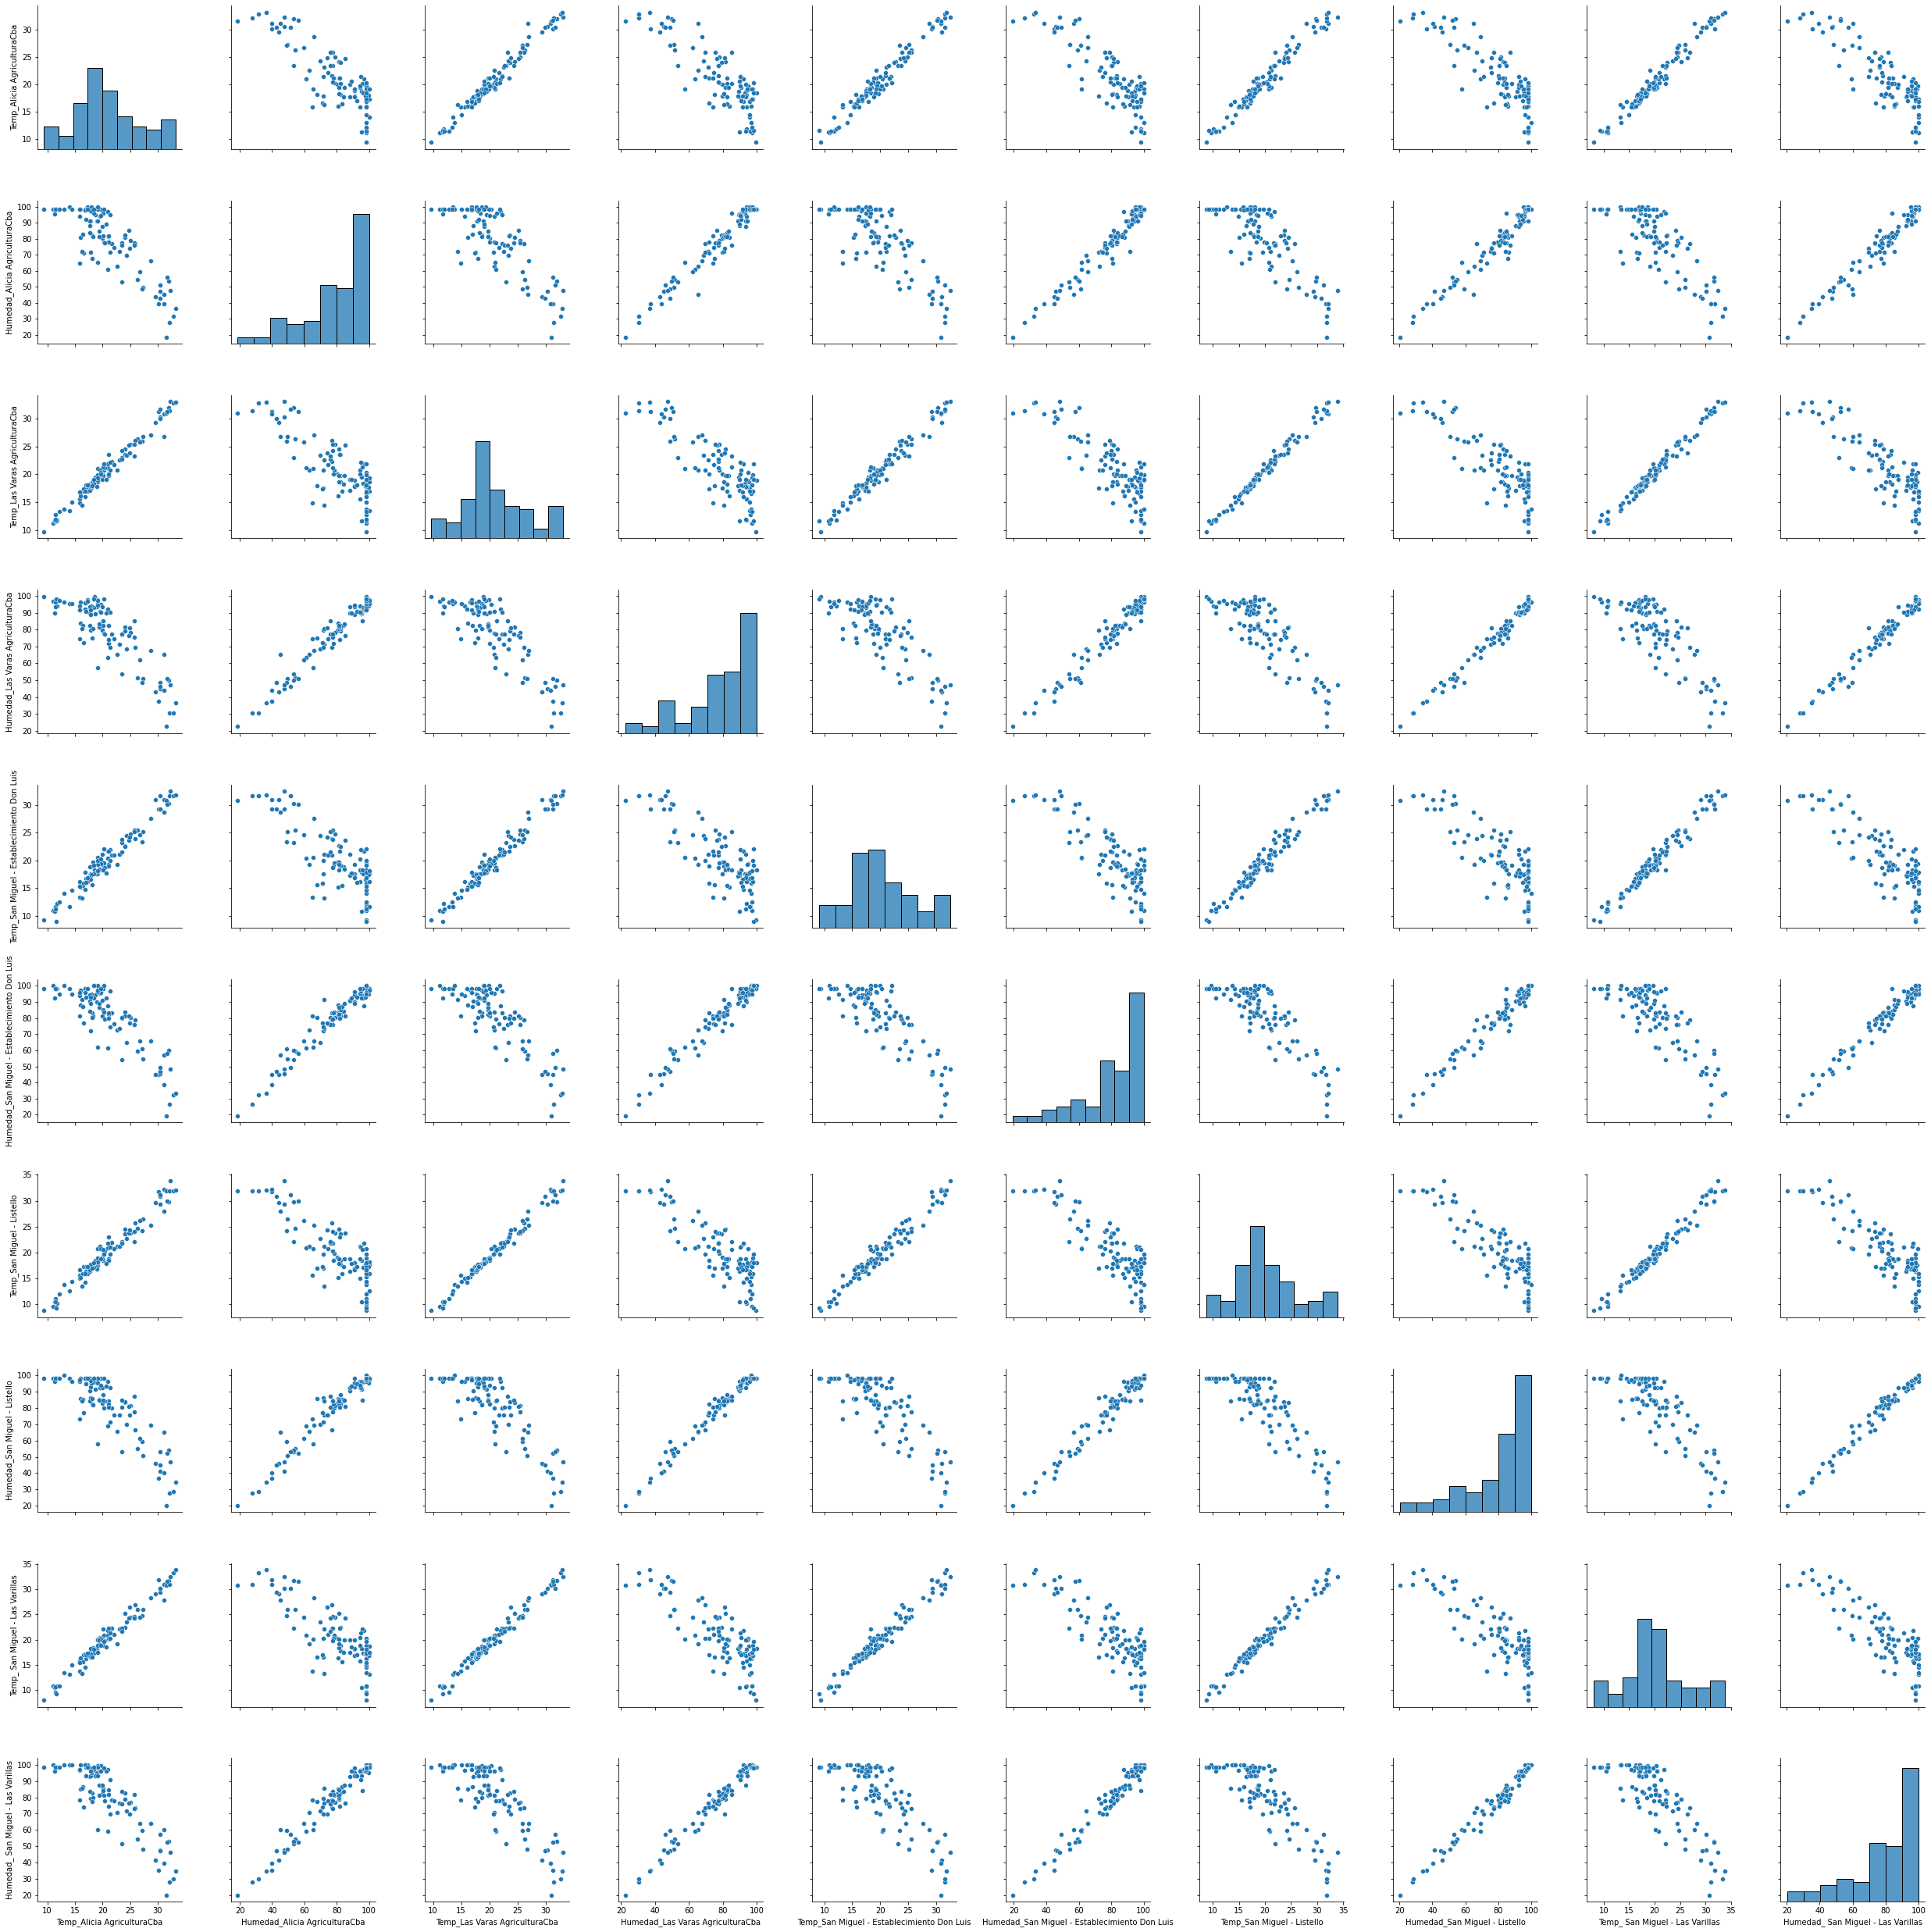

In [35]:
subset=df[[variables[3],variables[4], variables[6],variables[7], variables[9],variables[10],variables[12],variables[13], variables[15], variables[16]]].sample(n=100) 
g = sns.pairplot(subset, height=3.5)

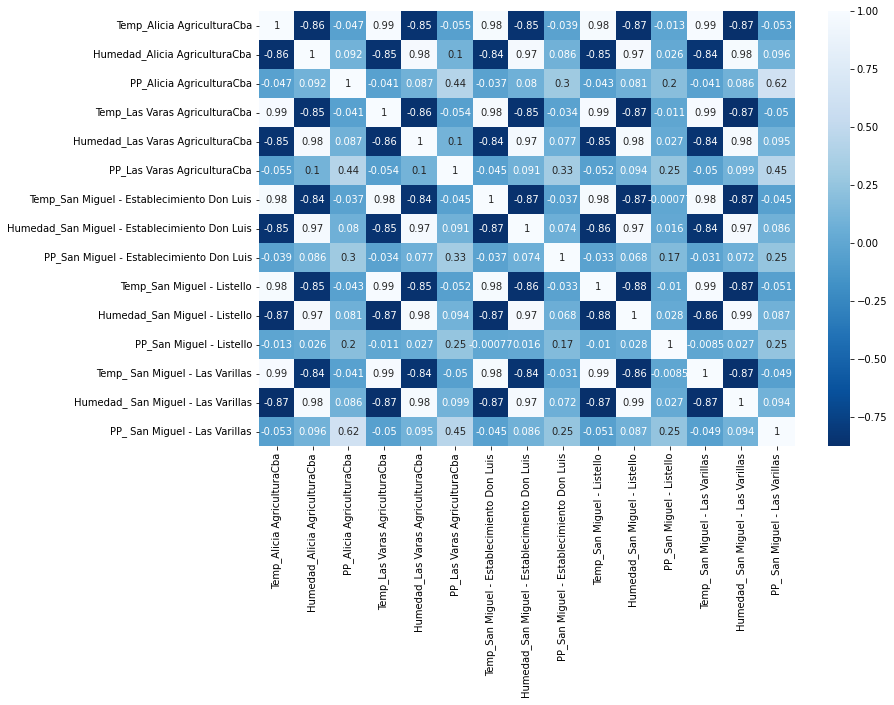

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(matriz, cmap='Blues_r', annot=True)

# Regresión Lineal

In [49]:
# importo librerias necesarias
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [50]:
x= df[[ 'Temp_Las Varas AgriculturaCba', 'Humedad_Las Varas AgriculturaCba',
        'Temp_San Miguel - Establecimiento Don Luis', 'Humedad_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'Temp_ San Miguel - Las Varillas', 'Humedad_ San Miguel - Las Varillas']]
y= df["Temp_Alicia AgriculturaCba"]

In [51]:
#Separo los datos de "train" en entrenamiento y prueba "test" para probar los algoritmos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [52]:
#Defino el algoritmo a utilizar
lr = LinearRegression()


#Entreno el modelo
lr.fit(x_train, y_train)




LinearRegression()

In [53]:
y_pred_lineal_train = lr.predict(x_train)
print('Precisión del modelo usando el (MSE):')
score_train = mse(y_train,y_pred_lineal_train)

print (score_train)

Precisión del modelo usando el (MSE):
0.6251280521513793


In [55]:
# guardando el modelo usando pickle
import pickle
pickle.dump(lr, open('modeloLineal.pkl','wb',))
from google.colab import files
files.download("modeloLineal.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
import joblib

In [58]:
modelo = joblib.load('modeloLineal.pkl') # Carga del modelo.

In [59]:
print(modelo.predict([[1.8,10,12,45,4,12,36,11]]))

[16.40798767]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [60]:
#Realizo una predicción
y_pred_lineal_testeo = lr.predict(x_test)
y_pred_lineal_testeo

array([27.89609183, 30.52593271, 19.94795126, ..., 24.20684952,
       15.62503972, 22.51753457])

In [61]:

print('Precisión del modelo usando el (MSE):')
score_testeo = mse(y_test,y_pred_lineal_testeo)

print (score_testeo)

Precisión del modelo usando el (MSE):
0.6779307335532956


In [ ]:
print('DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE')
print()
print('Valor de los coeficientes de cada variale regresora usada en el modelo:')
print(lr.coef_)
print()
print('Valor de la intersección:')
print(lr.intercept_)


DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE

Valor de los coeficientes de cada variale regresora usada en el modelo:
[ 0.35626866  0.01451763  0.11463117 -0.02017878  0.12672709  0.01855433
  0.35065603 -0.01862197]

Valor de la intersección:
2.0056630571544893


In [ ]:
#ahora le agregamos grados al polinomio y estandarizamos las features
modelo = Pipeline([('scaler', StandardScaler()),('features', PolynomialFeatures(degree=1)),
                    ('regression', LinearRegression()),
                    ])


In [ ]:
modelo.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('features', PolynomialFeatures(degree=1)),
                ('regression', LinearRegression())])

In [ ]:
y_pred_polinomica_train = modelo.predict(x_train)
print('Precisión del modelo usando el (MSE):')
score_train = mse(y_train,y_pred_polinomica_train)

print (score_train)

Precisión del modelo usando el (MSE):
0.6251280521513793


In [ ]:
#Realizo una predicción
y_pred_polinomica_testeo = modelo.predict(x_test)
y_pred_polinomica_testeo
print('Precisión del modelo usando el (MSE):')
score_testeo = mse(y_test,y_pred_polinomica_testeo)

print (score_testeo)

Precisión del modelo usando el (MSE):
0.6779307335532957


In [ ]:
print(modelo['regression'].coef_)


[ 0.          2.06210134  0.2911924   0.67776441 -0.41617909  0.77392234
  0.40298214  2.14755702 -0.40743924]


# Regresión Lasso

Una regresión regularizada diferente que se usa a menudo es la regresión LASSO, que naturalmente selecciona las variables más relevantes y produce modelos más parsimoniosos.

LASSO usa la norma , que es simplemente la suma de los valores absolutos de los parámetros del modelo.
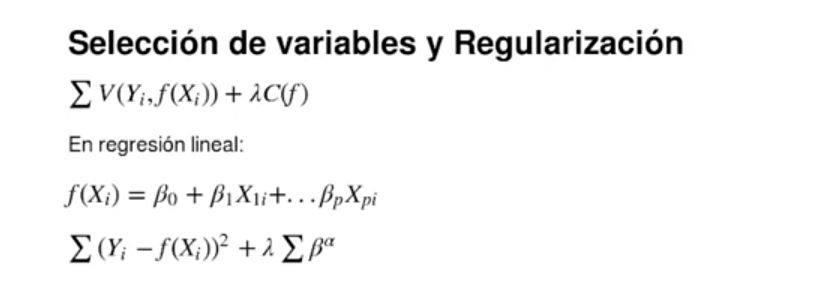

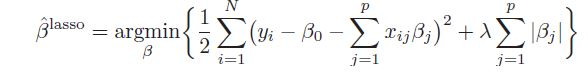


La primera consecuencia de esta elección de penalización es que la función de error ya no puede optimizarse (minimizarse) de manera analítica. Hay que recurrir, entonces, a diferentes algoritmos iterativos.

En sklearn, existen al menos dos implementaciones:

linear_model.Lasso, que usa coordinate descent para encontrar el mínimo.


linear_model.LassoLars, que usa LARS (least angle regression), que es similar a forward stepwise regression (es decir, se empieza con los coeficientes en cero, , y se van aumentando prograsivamente.

In [72]:
from sklearn.linear_model import Lasso,  LassoLars

In [73]:

modelo_Lars= Pipeline([ ('scaler', StandardScaler()),
                    ('features', PolynomialFeatures(degree=5)),
                     ('model',LassoLars(alpha=1e-07))
])

In [74]:
modelo_Lars.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


Pipeline(steps=[('scaler', StandardScaler()),
                ('features', PolynomialFeatures(degree=5)),
                ('model', LassoLars(alpha=1e-07))])

In [75]:
y_pred_lasso_train = modelo_Lars.predict(x_train)
print('Precisión del modelo usando el (MSE):')
score_train = mse(y_train,y_pred_lasso_train)

print (score_train)

Precisión del modelo usando el (MSE):
0.4479309417349494


In [76]:
y_pred_lasso_test = modelo_Lars.predict(x_test)
print('Precisión del modelo usando el (MSE):')
score_train = mse(y_test,y_pred_lasso_test)

print (score_train)

Precisión del modelo usando el (MSE):
0.48652897734122325


In [77]:
print(modelo_Lars['model'].coef_)


[0.         2.37364051 0.53596539 ... 0.         0.03009442 0.        ]


# Regresión Ridge




En vistas de que los valores de los coeficientes aumentan dramáticamente cuando empezamos a sobreajustar, podemos pensar en incluir una penalización para valores muy grandes de los parámetros. Escribimos, entonces, una nueva función de error

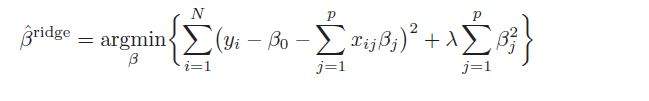

In [62]:
from sklearn.linear_model import Ridge

In [63]:
modelo_Ridge= Pipeline([ ('scaler', StandardScaler()),
                    ('features', PolynomialFeatures(degree=5)),
                     ('model',Ridge(alpha=1e-07))
])

In [64]:
modelo_Ridge.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.39883e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Pipeline(steps=[('scaler', StandardScaler()),
                ('features', PolynomialFeatures(degree=5)),
                ('model', Ridge(alpha=1e-07))])

In [65]:
y_pred_Ridge_train = modelo_Ridge.predict(x_train)
print('Precisión del modelo usando el (MSE):')
score_train = mse(y_train,y_pred_Ridge_train)

print (score_train)

Precisión del modelo usando el (MSE):
0.2851232560221037


In [66]:
y_pred_Ridge_test = modelo_Ridge.predict(x_test)
print('Precisión del modelo usando el (MSE):')
score_train = mse(y_test,y_pred_Ridge_test)

print (score_train)

Precisión del modelo usando el (MSE):
3.977434579328673


In [67]:
print(modelo_Ridge['model'].coef_)

[ 0.00000000e+00  3.18914247e+00  3.74226850e-01 ... -6.81201980e+02
 -1.97618113e+02 -3.70937478e+01]


In [68]:
y_test = y_test.to_numpy()

In [69]:
y_test

array([28. , 30.6, 20.1, ..., 23. , 14.8, 22.1])

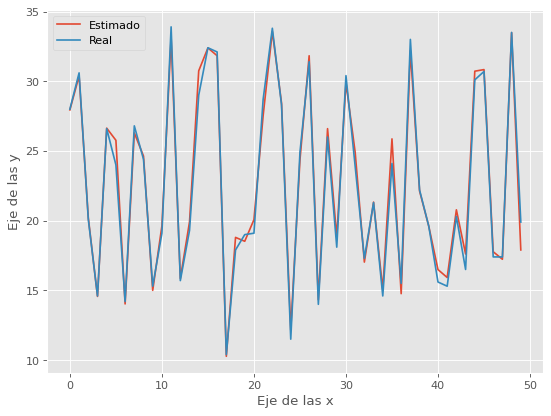

In [78]:
from matplotlib import pyplot
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

pyplot.style.use('ggplot')

figure(figsize=(8, 6), dpi=80)


pyplot.plot(y_pred_lasso_test[:50])
pyplot.plot(y_test[:50])
plt.legend(['Estimado','Real'])
plt.xlabel('Eje de las x')
plt.ylabel('Eje de las y')
plt.show()